In [2]:
import os
from collections import Counter

base_path = 'public_dataset/'
# find all .ogg and .webm files
audio_files = []
for root, _, files in os.walk(base_path):
    for f in files:
        if f.lower().endswith(('.ogg')): #or '.webm'
            audio_files.append(os.path.join(root, f))

# counts by extension
ext_counts = Counter(os.path.splitext(f)[1].lower() for f in audio_files)
print("Total files:", len(audio_files))
print(audio_files[0])
print("By format:", ext_counts)


Total files: 859
public_dataset/0080c4be-010c-4037-bba2-743437db3beb.ogg
By format: Counter({'.ogg': 859})


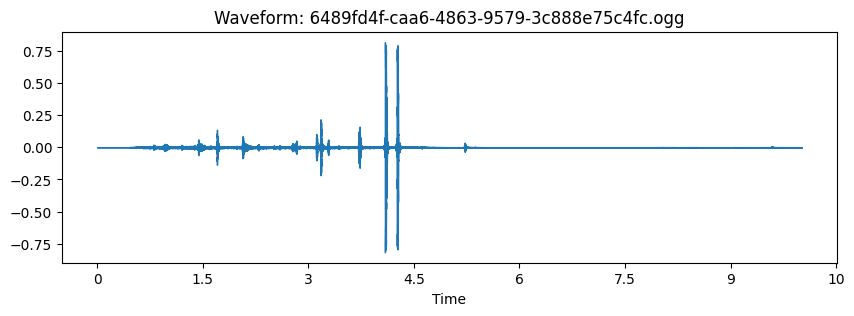

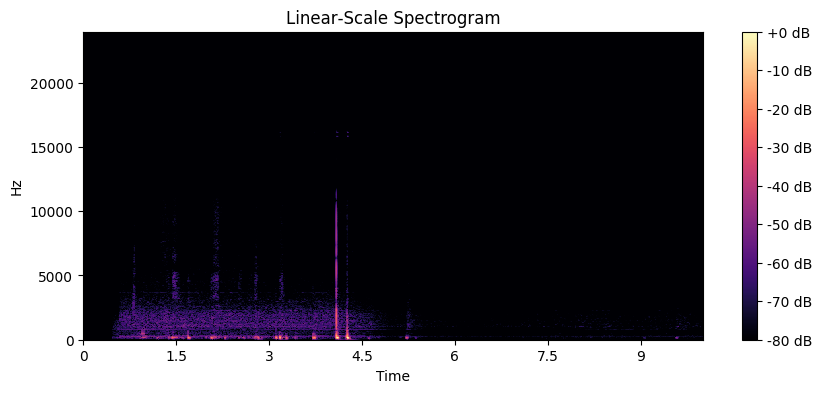

In [3]:
import random
import librosa.display
import matplotlib.pyplot as plt

sample_fp = random.choice(audio_files)
y, sr = librosa.load(sample_fp, sr=None)
plt.figure(figsize=(10,3))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform: {os.path.basename(sample_fp)}')
plt.show()

# Spectrogram
import numpy as np
D = np.abs(librosa.stft(y))
DB = librosa.amplitude_to_db(D, ref=np.max)
plt.figure(figsize=(10,4))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear‐Scale Spectrogram')
plt.show()


In [4]:
import librosa
import pandas as pd

records = []
for fp in audio_files:
    # load minimally: only header info if using soundfile
    y, sr = librosa.load(fp, sr=None, mono=False)  
    duration = y.shape[-1] / sr
    channels = 1 if y.ndim == 1 else y.shape[0]
    records.append({'file': os.path.basename(fp),
                    'ext': os.path.splitext(fp)[1].lower(),
                    'sr': sr,
                    'duration_s': duration,
                    'channels': channels})

df_meta = pd.DataFrame(records)
df_meta.head()


,file,ext,sr,duration_s,channels
0,0080c4be-010c-4037-bba2-743437db3beb.ogg,.ogg,48000,10.010083,1
1,009e677f-e0ed-4765-9f9e-db3fff3921a3.ogg,.ogg,48000,9.738667,1
2,009e762a-b4f7-41a6-a419-b4ca51be88ec.ogg,.ogg,48000,10.013333,2
3,00a0156b-7179-4773-8a2c-4bb919e076bd.ogg,.ogg,48000,4.426896,2
4,0288d081-951c-45f1-9fa6-9ce81a222716.ogg,.ogg,48000,2.816000,2


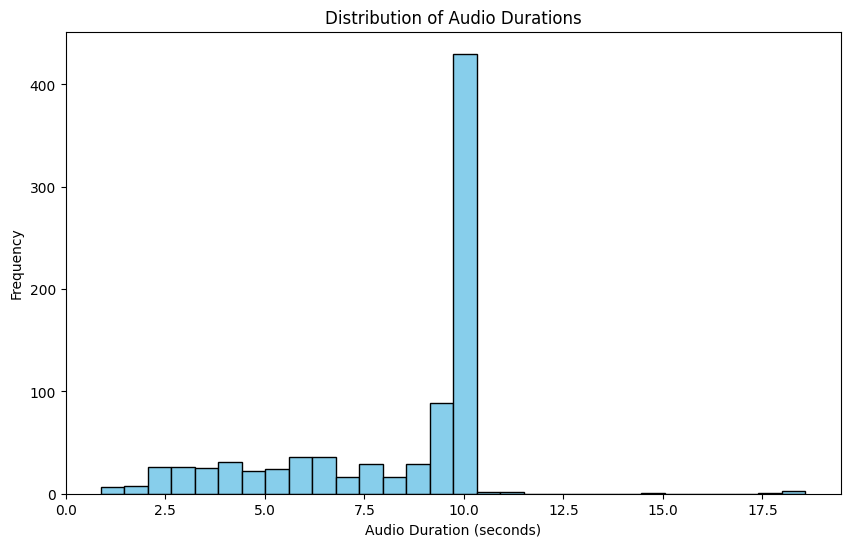

In [5]:
#Examine audio duration
plt.figure(figsize=(10, 6))
plt.hist(df_meta['duration_s'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Audio Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio Durations')
plt.show()

In [6]:
df_meta['duration_s'].describe()

count    859.000000
mean       8.194027
std        2.667829
min        0.880000
25%        6.292052
50%        9.760000
75%        9.997333
max       18.580583
Name: duration_s, dtype: float64

Labels analysis

In [11]:
data = pd.read_csv("public_dataset\metadata_compiled.csv")
data.head()

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3
0,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,31.3,34.8,15.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,40.0,-75.1,34.0,male,True,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,-16.5,-71.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,001328dc-ea5d-4847-9ccf-c5aa2a3f2d0f,2020-04-13T22:23:06.997578+00:00,0.9968,NaN,NaN,21.0,male,False,False,healthy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,001c85a8-cc4d-4921-9297-848be52d4715,2020-04-17T15:24:35.822355+00:00,0.0735,40.6,-3.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data.describe(include="all")

,uuid,datetime,cough_detected,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,status,...,quality_3,dyspnea_3,wheezing_3,stridor_3,choking_3,congestion_3,nothing_3,cough_type_3,diagnosis_3,severity_3
count,20072,20072,20072.000000,11746.000000,11746.000000,10468.000000,11314,11314,11314,11314,...,820,820,820,820,820,820,820,795,793,796
unique,20072,20072,NaN,NaN,NaN,NaN,3,2,2,3,...,4,2,2,2,1,2,2,3,5,4
top,fffce9f0-a5e8-4bee-b13b-c671aac4a61c,2020-04-14T13:02:33.307684+00:00,NaN,NaN,NaN,NaN,male,False,False,healthy,...,good,False,False,False,False,False,True,dry,upper_infection,mild
freq,1,1,NaN,NaN,NaN,NaN,7226,9170,9818,8562,...,749,818,818,819,820,817,787,358,364,447
mean,NaN,NaN,0.641158,30.108888,4.993487,34.597602,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.380852,22.164328,54.551112,13.407909,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,0.000000,-54.800000,-158.100000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,0.214300,28.100000,-8.700000,25.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,0.844700,40.000000,6.700000,33.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,0.976000,41.600000,35.300000,43.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.isnull().sum()

uuid                         0
datetime                     0
cough_detected               0
latitude                  8326
longitude                 8326
age                       9604
gender                    8758
respiratory_condition     8758
fever_muscle_pain         8758
status                    8758
quality_1                19252
cough_type_1             19252
dyspnea_1                19252
wheezing_1               19252
stridor_1                19252
choking_1                19252
congestion_1             19252
nothing_1                19252
diagnosis_1              19252
severity_1               19252
quality_2                19252
cough_type_2             19253
dyspnea_2                19252
wheezing_2               19252
stridor_2                19252
choking_2                19252
congestion_2             19252
nothing_2                19252
diagnosis_2              19252
severity_2               19252
quality_3                19252
dyspnea_3                19252
wheezing

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20072 entries, 0 to 20071
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uuid                   20072 non-null  object 
 1   datetime               20072 non-null  object 
 2   cough_detected         20072 non-null  float64
 3   latitude               11746 non-null  float64
 4   longitude              11746 non-null  float64
 5   age                    10468 non-null  float64
 6   gender                 11314 non-null  object 
 7   respiratory_condition  11314 non-null  object 
 8   fever_muscle_pain      11314 non-null  object 
 9   status                 11314 non-null  object 
 10  quality_1              820 non-null    object 
 11  cough_type_1           820 non-null    object 
 12  dyspnea_1              820 non-null    object 
 13  wheezing_1             820 non-null    object 
 14  stridor_1              820 non-null    object 
 15  ch

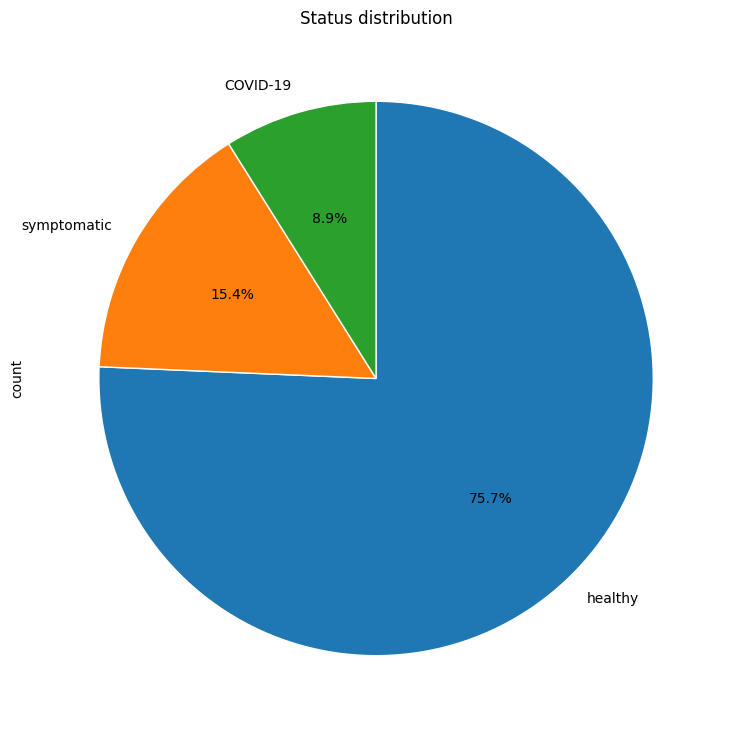

In [18]:
data_cleaned = data['status'].dropna()
counts = data_cleaned.value_counts()
plt.figure(figsize=(9,9))
counts.plot.pie(
    autopct='%1.1f%%',   # show percentages
    startangle=90,       # rotate so first slice starts at 12 o’clock
    counterclock=False,  # draw slices clockwise
    wedgeprops={'edgecolor':'w'}  # white borders between slices
)
plt.title("Status distribution")
plt.show()


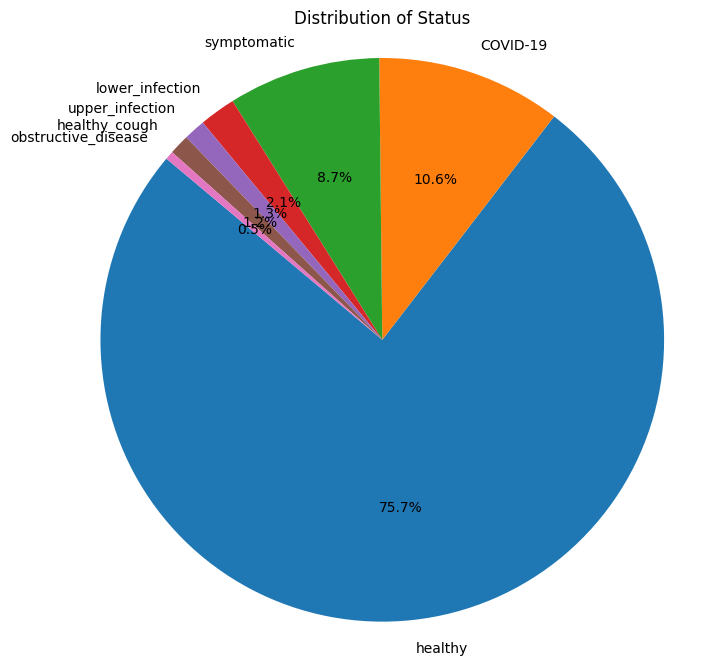

In [ ]:
# Define a function to get the first non-null diagnosis
def get_first_diagnosis(row):
    for col in ['diagnosis_1', 'diagnosis_2', 'diagnosis_3']:
        if pd.notna(row[col]):
            return row[col]
    return row['status']  # If all diagnoses are NaN, keep the original status

# Apply the function to update the 'status' column
data['status'] = data.apply(lambda row: get_first_diagnosis(row) if row['status'] == 'symptomatic' else row['status'], axis=1)
df_clean = data.dropna(subset=['status'])
# Count the occurrences of each status
status_counts = df_clean['status'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
